In [63]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [64]:
K = np.array([
    [7.215377e+02, 0.000000e+00, 6.095593e+02, 0],
    [0.000000e+00, 7.215377e+02, 1.728540e+02, 0],
    [0.000000e+00, 0.000000e+00, 1.000000e+00, 0]
    ], dtype=np.float32)

C = np.array([27, 6, -8], dtype=np.float32) * 0.01 # camera center

ROT = np.array([
    [0,-1,0, 0],
    [0,0,-1, 0],
    [1,0,0,  0],
    [0,0,0,  1],    
], dtype=np.float32)

TRANS = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1],    
], dtype=np.float32)

TRANS[:3,3] = -C

TM = np.matmul(ROT, TRANS)

P = np.matmul(K, TM)
P = P / P[2,3]

pts = load_points().T.astype(np.float32)# * 100.0
pts = np.concatenate((pts, np.ones(pts.shape[1])[np.newaxis,:]), axis=0)

transformed = np.matmul(P, pts)

depth = transformed[2]
transformed[0:2] = transformed[0:2] / transformed[2]

In [66]:
image = cv2.cvtColor(cv2.imread('image.png'), cv2.COLOR_BGR2RGB)
indices = (transformed[0] >= 0) * (transformed[0] <= image.shape[1]) * (transformed[1] >= 0) * (transformed[1] <= image.shape[0])
print(indices)

[ True  True  True ... False False False]


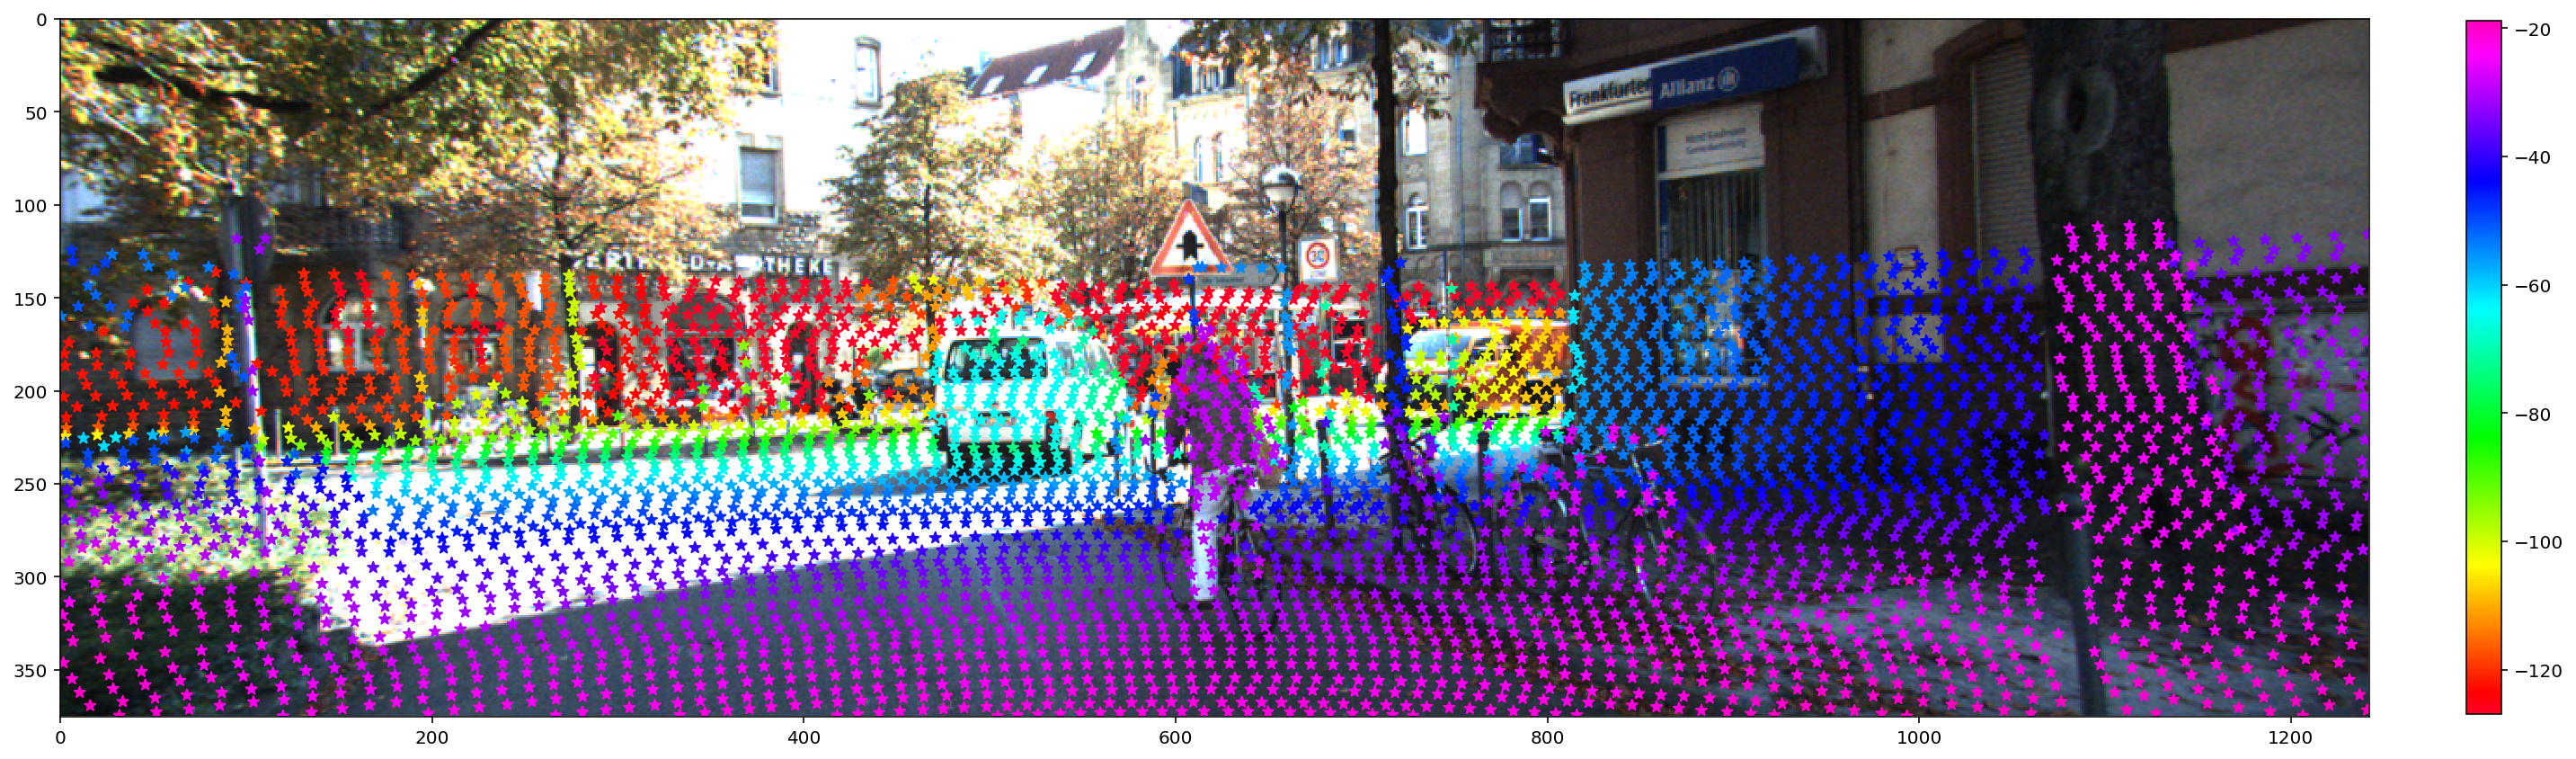

In [67]:
plt.figure(1,(20,20))
plt.imshow(image)
sc = plt.scatter(transformed[0, indices], transformed[1, indices], c=depth[indices], s=40, marker="*", vmin=-127, cmap='gist_rainbow')
plt.xlim(0, image.shape[1])
plt.ylim(image.shape[0], 0)
plt.colorbar(sc, fraction=0.0142, pad=0.04, shrink=2.0)
plt.tight_layout()
plt.savefig('Q1_C.png')
plt.show()